# FloPy--mf6

## Plotting Model Arrays and Results

This notebook demonstrates the simple array and results plotting capabilities of flopy when working with MODFLOW6 simulations. It demonstrates these capabilities by loading and running an existing model, and then showing how the .plot() method can be used to make simple plots of the model data and model results

In [1]:
from IPython.display import Image
import flopy as fp
import matplotlib.pyplot as plt
import os

# load the Freyberg model into mf6-flopy
sim_name = 'mfsim.nam'
sim_path = "../data/mf6-freyberg"
sim = fp.mf6.MFSimulation.load(sim_name=sim_name, version='mf6', exe_name='mf6', 
                               sim_ws=sim_path)



Directory structure already exists for simulation path C:\Users\jlarsen\Desktop\flopy-ogw\trunk\examples\Notebooks\..\data\mf6-freyberg
loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package oc...
    loading package npf...
    loading package sto...
    loading package chd...
    loading package riv...
    loading package wel...
    loading package rch...
  loading ims package gwf_1...


Multiple models can be attached to a mf6 simulation. 

Model names can be obtained by using the .model_names attribute of the MFSimulation object

In [2]:
sim.model_names

odict_keys(['gwf_1'])

A single model can be returned by using the .get_model() method

In [3]:
ml = sim.get_model('gwf_1')
ml

name = gwf_1
model_type = gwf
version = mf6
model_relative_path = 

###################
Package dis
###################

package_name = dis
filename = freyberg.dis
package_type = dis
model_or_simulation_package = model
model_name = gwf_1


###################
Package ic
###################

package_name = ic
filename = freyberg.ic
package_type = ic
model_or_simulation_package = model
model_name = gwf_1


###################
Package oc
###################

package_name = oc
filename = freyberg.oc
package_type = oc
model_or_simulation_package = model
model_name = gwf_1


###################
Package npf
###################

package_name = npf
filename = freyberg.npf
package_type = npf
model_or_simulation_package = model
model_name = gwf_1


###################
Package sto
###################

package_name = sto
filename = freyberg.sto
package_type = sto
model_or_simulation_package = model
model_name = gwf_1


###################
Package chd_0
###################

package_name = chd_0
file

## Plotting Model Data

Once a simulation or model object is created, MODFLOW 6 package data can be plotted using the `.plot()` method.

The model grid can be plotted simply by calling the `.plot()` method

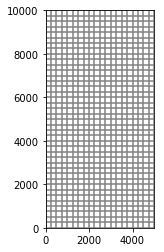

In [4]:
ml.modelgrid.plot()

Two-dimensional data (for example, the model bottom) can be plotted by calling the `.plot()` method for each data array

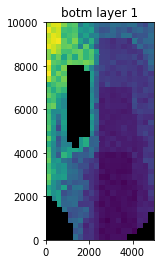

In [5]:
ml.dis.botm.plot()

As you can see, the `.plot()` method returns a `matplotlib.pyplot.axis` object, which can be used to add additional data to the figure. Below we will add black contours to the axis returned in the first line

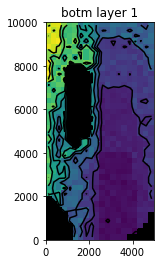

<Figure size 432x288 with 0 Axes>

In [6]:
ax = ml.dis.botm.plot()
ml.dis.botm.plot(axes=ax, contour=True, pcolor=False)

You will notice that we passed several keywords in the second line. There are a number of keywords that can be passed to the `.plot()` method to control plotting. Available keywords are:

1. `axes` - if you already have plot axes you can pass them to the method
2. `pcolor` - turns pcolor on if `pcolor=True` or off if `pcolor=False`, default is `pcolor=True`
3. `colorbar` - turns on colorbar if `colorbar=True` or off if `colorbar=False`, default is `colorbar=False` and is only used if `pcolor=True`
4. `inactive` - turns on a black inactive cell overlay if inactive=True or turns off the inactive cell overlay if `inactive=False`, default is `inactive=True`
5. `contour` - turns on contours if `contour=True` or off if `contour=False`, default is `contour=False`
6. `clabel` - turns on contour labels if `clabel=True` or off if `clabel=False`, default is `clabel=False` and is only used if `contour=True`
7. `grid` - turns on model grid if `grid=True` or off if `grid=False`, default is `grid=False`
8. `masked_values` - list with unique values to be excluded from the plot (for example, HNOFLO)
9. `mflay` - for three-dimensional data (for example layer bottoms or simulated heads) mflay can be used to plot data for a single layer - note mflay is zero-based
10. `kper` - for transient two-dimensional data (for example recharge package data) kper can be used to plot data for a single stress period - note kper is zero-based
11. `filename_base` - a base file name that will be used to automatically generate file names for two-dimensional, three-dimensional, and transient two-dimensional data, default is filename_base=None
12. `file_extension` - valid matplotlib file extension, default is png and is only used if filename_base is specified
13. `matplotlib.pyplot` keywords are also accepted

The previous code block is recreated in a single line using keywords in the code block below.

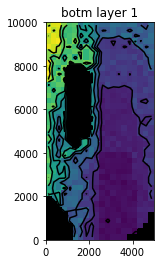

In [7]:
ml.dis.botm.plot(contour=True)

We can save the same image to a file

In [8]:
fname = os.path.join(sim_path, "freyberg")
ml.dis.botm.plot(contour=True, filename_base=fname)

    created...freyberg_b_Layer1.png


The image file that was just created is shown below

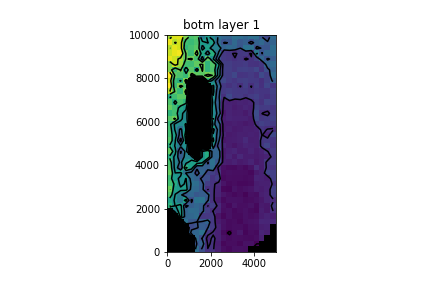

In [9]:
fname = os.path.join(sim_path, "freyberg_b_Layer1.png")
Image(filename=fname)

## Plotting package data

Single layer and three-dimensional data can be plotted using the `.plot()` method. User's do not actually need to know that the data are two- or three-dimensional. The `.plot()` method is attached to the two- and three-dimensional data objects so it knows how to process the model data. Examples of three dimensional data are horizontal hydraulic conductivity (hk), layer bottoms (botm), specific storage (ss), etc...

Here we plot the horizontal conductivity for all layers in the model, since Freyberg is a one layer model, it only returns data for layer 1. If our model was multiple layers, the same function call would return a `matplotlib.pyplot.axes` object for each layer.

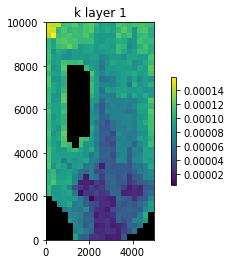

In [10]:
ml.npf.k.plot(masked_values=[0.], colorbar=True)

### Plotting data for a single layer

If the `mflay=` keyword is provided to the .plot() method then data for an individual layer is plotted. Remeber mflay is zero based

If we want to plot a single layer ex. layer 1 (`mflay=0`)

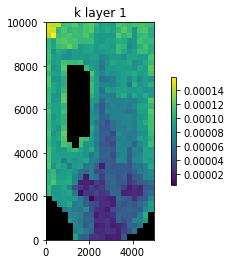

In [11]:
ml.npf.k.plot(mflay=0, masked_values=[0.], colorbar=True)

## Plotting transient two-dimensional data

Transient two-dimensional data can be plotted using the `.plot()` method. User's do not actually need to know that the data are two- or three-dimensional. The `.plot()` method is attached to the data type, therefore transient data types already know how to process the model data. 

Examples of transient data are recharge rates (`rch.recharge`) and pumpage from wells (`wel.q`).

Here we plot recharge rates for the single stress period in the Freyberg model. If our model has transient stress periods, the keword `kper='all'` can be used to plot data from all stress periods

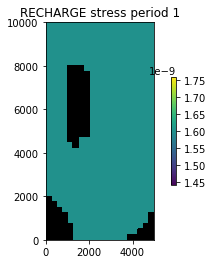

In [12]:
ml.rch.recharge.plot(kper='all', masked_values=[0.], 
                     colorbar=True)

We can also save the image to a file by providing the `filename_base=` keyword with an appropriate base file name

In [13]:
fbase = os.path.join(sim_path, "freyberg_rch")
ml.rch.recharge.plot(kper=0, masked_values=[0.], colorbar=True,
                     filename_base=fbase)

    created...freyberg_rch_00001.png


[None]

If the kper keyword is not provided, images are saved for each stress period in the model

The image file that was just created of recharge rates for stress period 1 is shown below

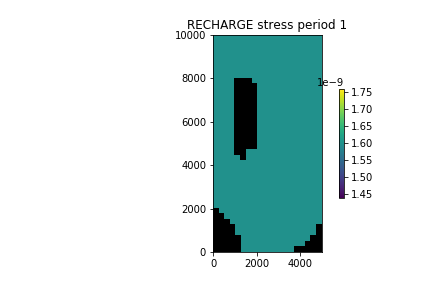

In [14]:
fname = os.path.join(sim_path, 'freyberg_rch_00001.png')
Image(filename=fname)

## Plotting simulated model results

Simulated model results can be plotted using the `.plot()` method.

First we create an instance of the HeadFile class with the simulated head file (freyberg.hds) and extract the simulation times available in the binary head file using the `.get_times()` method. Here we plot last simulated heads in the binary heads file (`totim=times[-1]`). We are also masking cells having the HDRY (1e+30) value and adding a colorbar

[10.0]

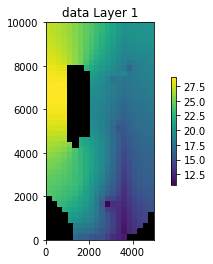

In [15]:
hds_name = os.path.join(sim_path, 'freyberg.hds')
headobj = fp.utils.HeadFile(hds_name, model=ml)
times = headobj.get_times()
head = headobj.plot(totim=times[-1],
                   masked_values=[1e30],
                   colorbar=True)
times

We can also save the plots of read results for a single layer (or every layer) to a file by providing the filename_base keyword with an appropriate base file name

In [16]:
fbase = os.path.join(sim_path, "freyberg_head")

head = headobj.plot(totim=times[-1],
                   masked_values=[1e30],
                   colorbar=True,
                   contour=True, colors='black',
                   filename_base=fbase,
                   mflay=0)

    created...freyberg_head_Layer1.png


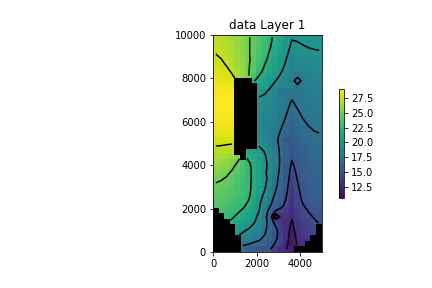

In [17]:
fname = os.path.join(sim_path, 'freyberg_head_Layer1.png')
Image(filename=fname)

## Passing other `matplotlib.pyplot` keywords to `.plot()` methods

We can also pass `matplotlib.pyplot` keywords to `.plot()` methods attached to the model input data arrays. For example you can pass a `matplotlib` colormap (`cmap=`) keyword to the `.plot()` method to plot contours of simulated heads over a color flood of hk. We can also use the `norm=LogNorm()` keyword to use a log color scale when plotting hydraulic conductivity.

Available `matplotlib` colormaps can be found at http://matplotlib.org/examples/color/colormaps_reference.html

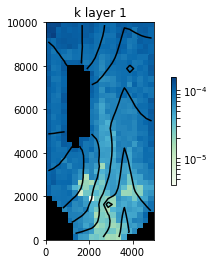

<Figure size 432x288 with 0 Axes>

In [18]:
from matplotlib.colors import LogNorm
ax = ml.npf.k.plot(mflay=0, cmap='GnBu', norm=LogNorm(), colorbar=True)
t = headobj.plot(axes=ax, mflay=0, masked_values=[1e30],
                 pcolor=False, contour=True,
                 colors='black')

## Plotting data for a package, a model, or a simulation

The input data for a model or an individual package can also be plotted using the `.plot()` method. The `.plot()` methods attached to a model or an individual package are meant to provide a method to quickly evaluate model or package input. As a result, there is limited ability to customize the plots. Example of using the `.plot()` method with a model or and individual packages is demonstrated below.

### Plot all data for a package

All input data for a package can be plotted using the `.plot()` method. Below all of the data for the lpf package is plotted.

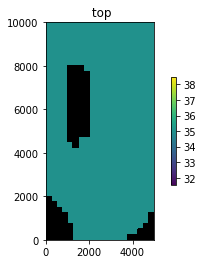

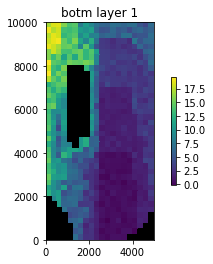

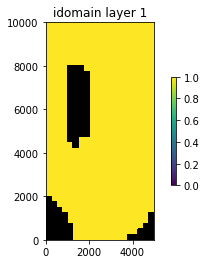

In [19]:
ml.dis.plot()

### Plot package input data for a specified layer

Package input data for a specified layer can be plotted by passing the `mflay` keyword to the package `.plot()` method. Below lpf package input data for layer 1 (`mflay=0`) is plotted.

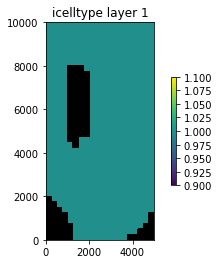

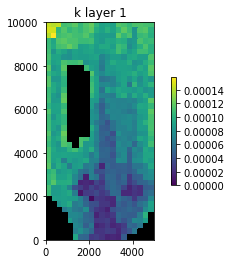

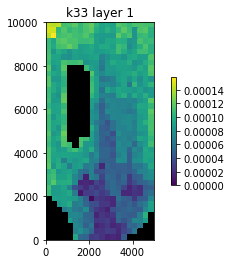

In [20]:
ml.npf.plot(mflay=0)

### Plot all input data for a model

All of the input data for a model can be plotted using the `.plot()` method. Alternatively a user can pass the `mflay` keyword to plot all model input data for a single layer

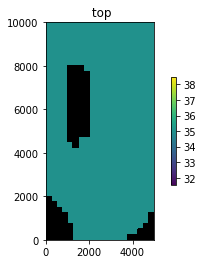

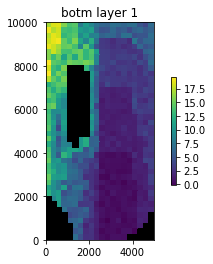

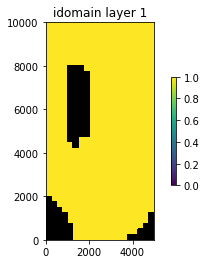

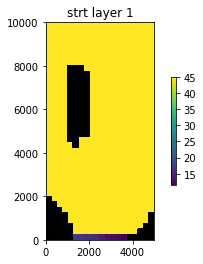

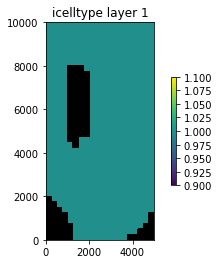

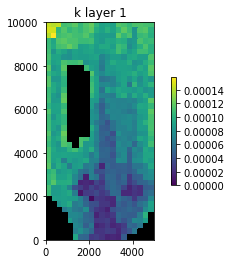

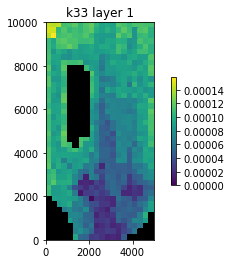

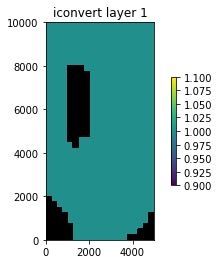

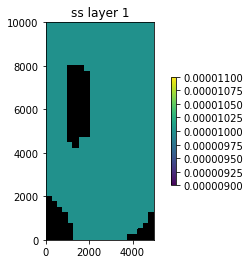

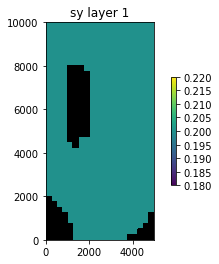

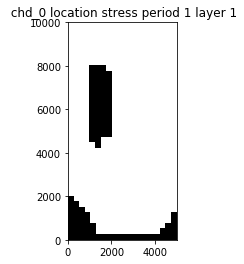

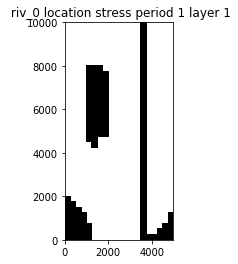

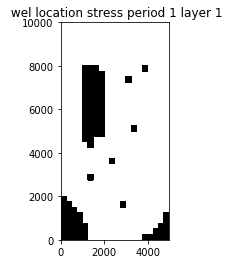

In [21]:
ml.plot()

### Plot all input data for a simulation

All of the input data for a simulation can be plotted using the `.plot()` method. Alternatively a user can pass the `mflay` keyword to plot all model input data for a single layer

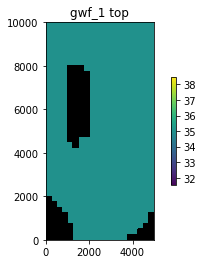

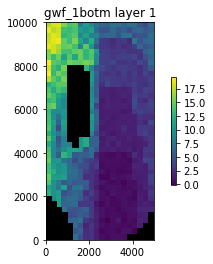

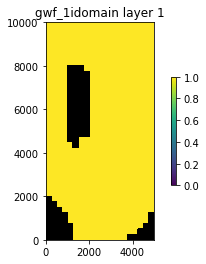

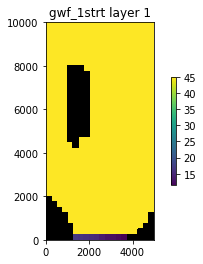

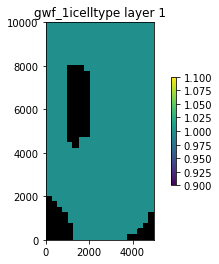

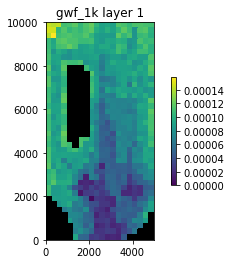

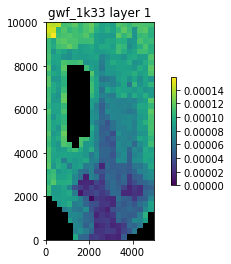

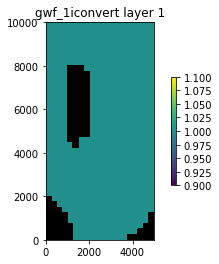

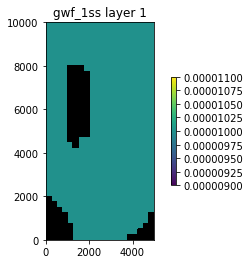

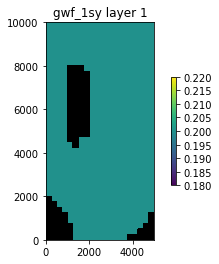

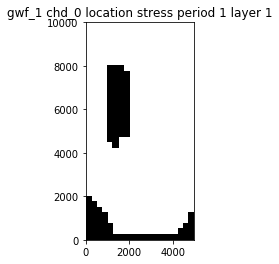

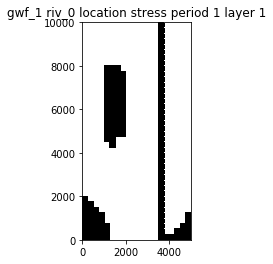

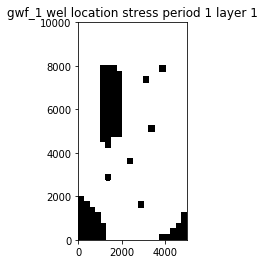

In [22]:
sim.plot()

# Summary

This notebook demonstrates some of the simple plotting functionality available with flopy when working with MODFLOW 6 simulations and models.  Although not described here, the plotting functionality tries to be general by passing keyword arguments passed to the `plot()` and `plot_data()` methods down into the `matplot.pyplot` routines that do the actual plotting.  For those looking to customize these plots, it may be necessary to search for the available keywords.  The `plot()` method return the `matplot.pyplot` axis objects that are created (or passed). These axes objects can be used to plot additional data (except when plots are saved as image files).

Hope this gets you started!